In [8]:
import dalex as dx
import pandas as pd
import pickle
import xgboost as xgb
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_df = pd.read_csv('data/Bartek/new_preprocessed_dataset.csv')
y = input_df.loc[:,'Attrition']
X = input_df.drop('Attrition', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [4]:
path_lr = 'modele/l1_log_reg.p'
lr = pickle.load(open( path_lr, "rb" ))

/Users/dtgt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [5]:
y_pred = lr.predict_proba(X_train)[:,1]
y_pred

array([0.09562242, 0.16345641, 0.82659755, ..., 0.05007403, 0.01403939,
       0.19306989])

In [6]:
logit = np.log(y_pred/(1-y_pred))

plot_data = X_train.copy()
plot_data["logit"] = logit

1 of 20
2 of 20
3 of 20
4 of 20
5 of 20
6 of 20
7 of 20
8 of 20
9 of 20
10 of 20
11 of 20
12 of 20
13 of 20
14 of 20
15 of 20
16 of 20
17 of 20
18 of 20
19 of 20
20 of 20


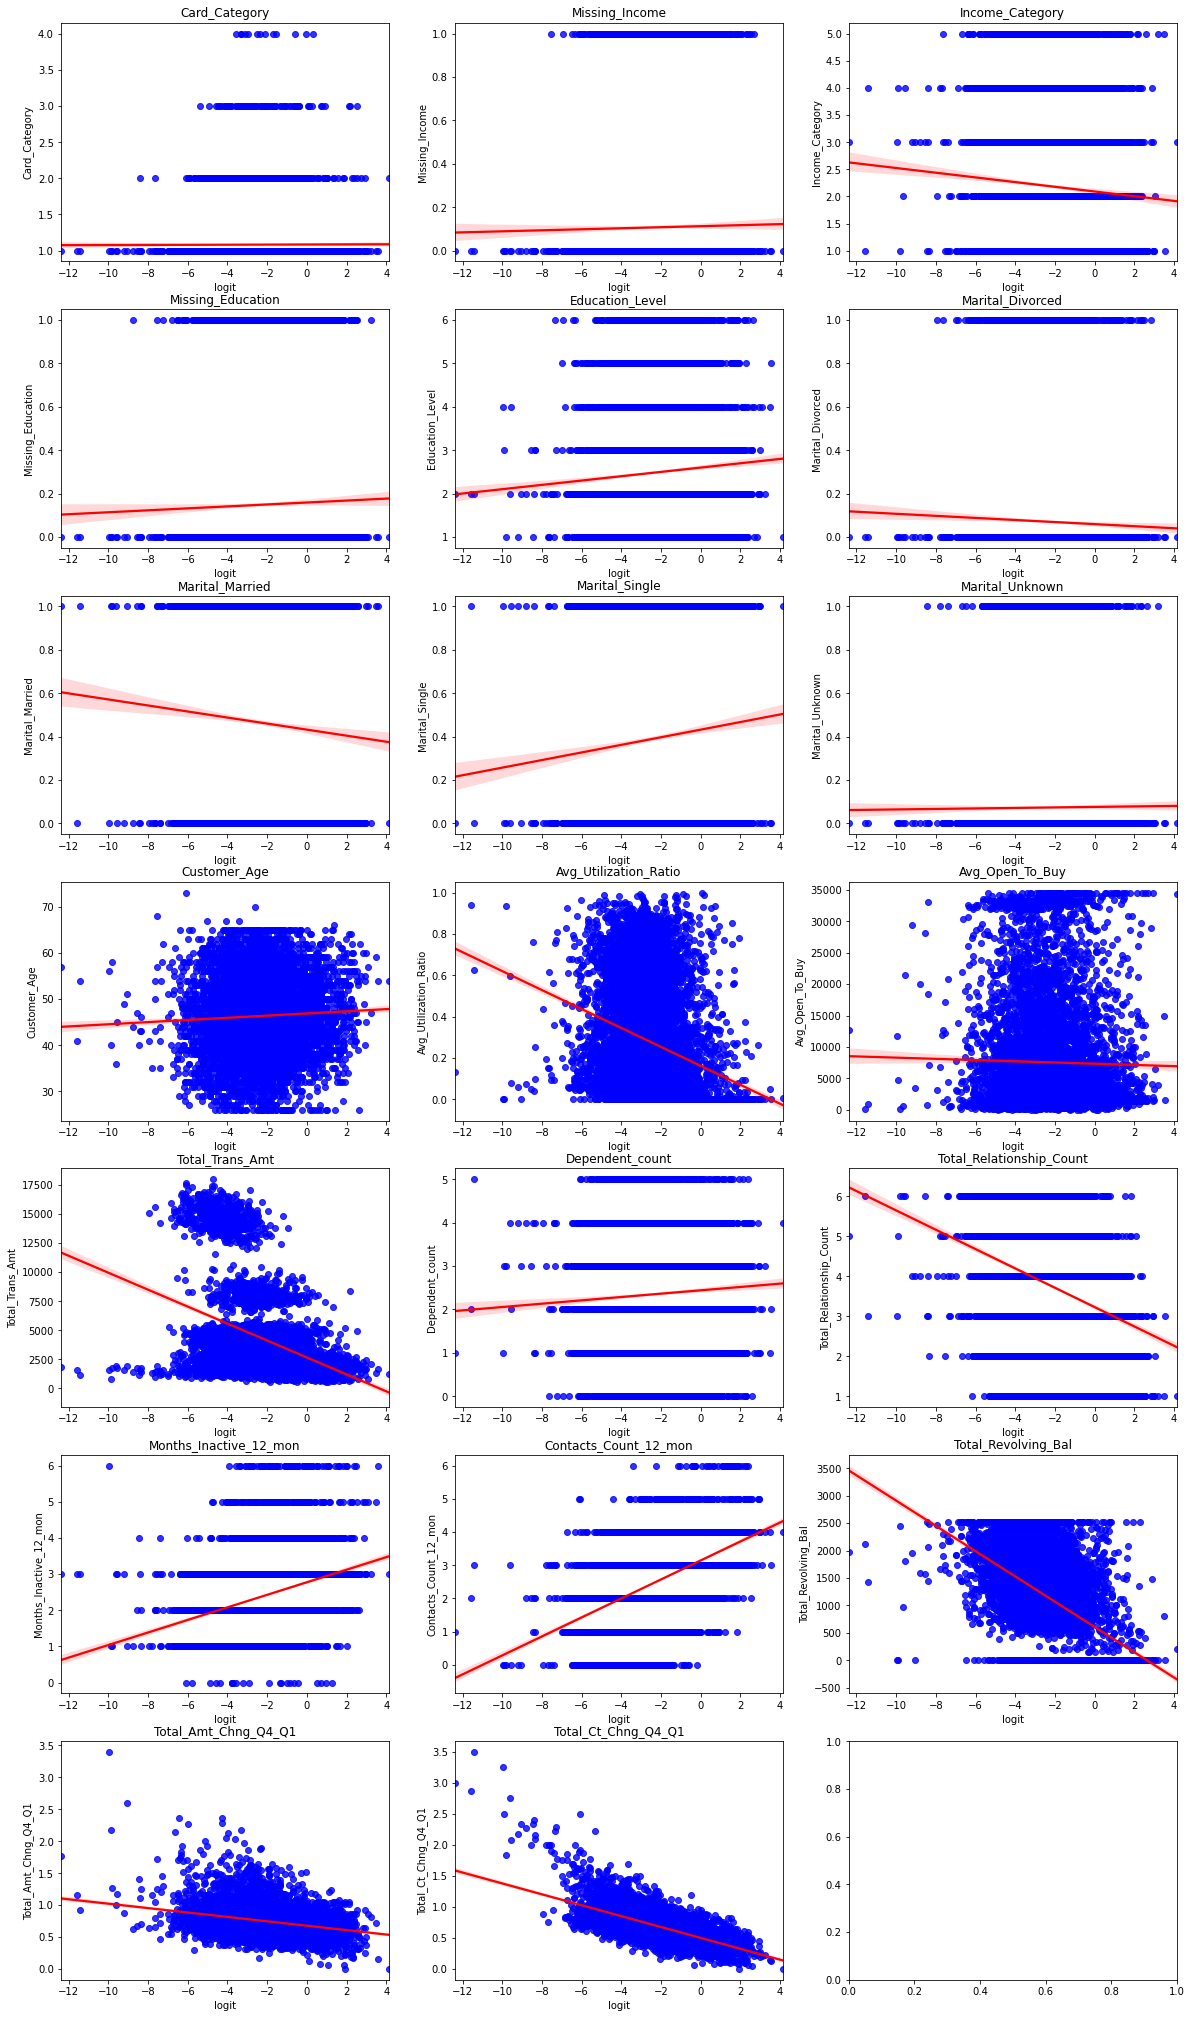

In [11]:
def plotLinearityAssumptionCheck(data):
    columns = data.columns[1:-1] # without 'logit' [1:-1]
    
    fig, ax = plt.subplots(len(columns)//3+1, 3,figsize=(20, 36))
    
    index = 0
    for i in range(7):
        for j in range(3):
            if i*3+(j+1)>len(columns):
                break
            print(f"{index+1} of {len(columns)}")
            
            sns.regplot(data=data, x="logit", y=columns[index], ax=ax[i][j], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
            
            ax[i][j].set_title(columns[index])
            index += 1
            
plotLinearityAssumptionCheck(plot_data)